In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/mnt/proj/adas-daas/common_libraries/adas_mtd/')
import src.data.utils.db_helper as dbh

In [3]:
recording_id = ['FH2369_20220322_141936','FH2467_20220322_125702','FH2467_20220408_120102']

In [4]:
config_path = '../config.yaml'

In [5]:
from scripts.dataloader import OnlineSpark
session = OnlineSpark(config_path,size='small')

In [6]:
session.path_dict

{'sut': {'root': 's3a://vasp-got-da/data/spark/rwup/sut/',
  'flc_obj': 's3a://vasp-got-da/data/spark/rwup/sut/record_id*flc*R5_object*',
  'vehicle': 's3a://vasp-got-da/data/spark/rwup/sut/record_id*vehicle*'},
 'avl_reference': {'root': 's3a://vasp-got-da/data/spark/rwup/avl_reference/',
  'ego': 's3a://vasp-got-da/data/spark/rwup/avl_reference/record_id*_ego_df*',
  'line': 's3a://vasp-got-da/data/spark/rwup/avl_reference/record_id*_line_df*',
  'object': 's3a://vasp-got-da/data/spark/rwup/avl_reference/record_id*_object_df*'}}

In [7]:
line = session.loadParquet('avl_reference','line',record_id=recording_id[2])

In [8]:
line.show(5)

+---------------+-------------+-------------+----------+------------+----+-----+--------------------+--------------------+--------------------+--------------------+-------+----------+-----------------+
|       ptp_time|MessageNumber|ReferenceType|TrackingID|SensorIDList|Type|Color|       BoundaryLineX|       BoundaryLineY|       BoundaryLineZ|        recording_id|vehicle|sw_version|__index_level_0__|
+---------------+-------------+-------------+----------+------------+----+-----+--------------------+--------------------+--------------------+--------------------+-------+----------+-----------------+
|1.64941926311E9|            0|         Line|       5.0|       100.0| 0.0|  0.0|[210.546478271484...|[-7.0413537025451...|[21.3689479827880...|FH2467_20220408_1...| FH2467|    1.1.11|                0|
|1.64941926311E9|            0|         Line|       3.0|       100.0| 3.0|  3.0|[211.654083251953...|[7.21988725662231...|[21.7820148468017...|FH2467_20220408_1...| FH2467|    1.1.11|         

In [9]:
import time
from datetime import datetime

time_interval = ['2022-04-08 12:16:04.899', '2022-04-08 12:21:02.199']
ptp_time_range = [int(pd.to_datetime(time_interval[0],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp()),
                  int(pd.to_datetime(time_interval[1],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp())]


In [10]:
line_sample = line.filter(line.ptp_time.between(ptp_time_range[0],ptp_time_range[1])).toPandas()
pd.options.display.float_format = '{:.0f}'.format

In [11]:
line_sample

,ptp_time,MessageNumber,ReferenceType,TrackingID,SensorIDList,Type,Color,BoundaryLineX,BoundaryLineY,BoundaryLineZ,recording_id,vehicle,sw_version,__index_level_0__
0,1649420164,10,Line,1,100,3,3,"[-12.534867286682129, -11.550684928894043, -10...","[3.4708662033081055, 3.4192395210266113, 3.392...","[-4.997784614562988, -4.885239124298096, -4.77...",FH2467_20220408_120102,FH2467,1.1.11,80
1,1649420164,10,Line,2,100,4,3,"[-10.7478609085083, -9.619674682617188, -8.800...","[7.43463659286499, 7.408340930938721, 7.369052...","[-4.734490871429443, -4.605616569519043, -4.51...",FH2467_20220408_120102,FH2467,1.1.11,81
2,1649420164,10,Line,3,100,3,3,"[-6.239081382751465, -5.162238597869873, -4.35...","[11.132694244384766, 11.120847702026367, 11.12...","[-4.178946495056152, -4.05529260635376, -3.963...",FH2467_20220408_120102,FH2467,1.1.11,82
3,1649420164,10,Line,5,100,0,0,"[-11.751920700073242, -10.823974609375, -9.855...","[-2.0566306114196777, -2.083430528640747, -2.0...","[-5.001999378204346, -4.898379802703857, -4.79...",FH2467_20220408_120102,FH2467,1.1.11,83
4,1649420164,10,Line,4,100,3,3,"[-12.284157752990723, -11.157736778259277, -10...","[0.145445317029953, 0.09842883795499802, 0.067...","[-5.027829647064209, -4.899879455566406, -4.83...",FH2467_20220408_120102,FH2467,1.1.11,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,1649420462,2989,Line,89,100,0,0,"[-197.8124542236328, -196.94171142578125, -195...","[40.18096160888672, 40.01088333129883, 39.8198...","[-26.57158660888672, -26.493932723999023, -26....",FH2467_20220408_120102,FH2467,1.1.11,39828
39749,1649420462,2989,Line,93,100,4,3,"[-186.79293823242188, -186.7352752685547, -186...","[34.98501205444336, 34.05847930908203, 32.1958...","[-25.27508544921875, -25.24933624267578, -25.1...",FH2467_20220408_120102,FH2467,1.1.11,39829
39750,1649420462,2989,Line,95,100,3,3,"[-175.63894653320312, -176.10960388183594, -17...","[37.89985275268555, 37.293216705322266, 36.748...","[-24.18938636779785, -24.155040740966797, -24....",FH2467_20220408_120102,FH2467,1.1.11,39830
39751,1649420462,2989,Line,91,100,3,3,"[-190.2189483642578, -190.52825927734375, -190...","[27.64755630493164, 29.007333755493164, 29.430...","[-25.563737869262695, -25.611831665039062, -25...",FH2467_20220408_120102,FH2467,1.1.11,39831


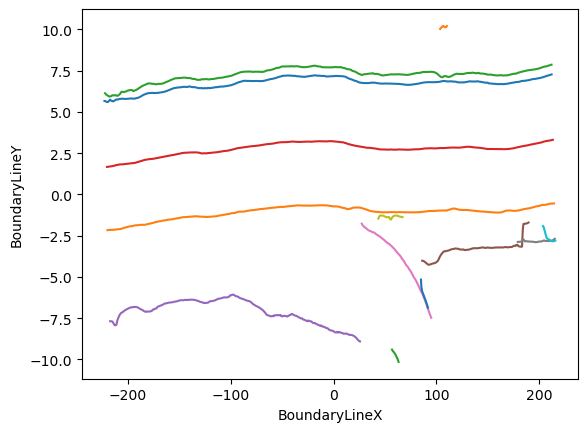

In [12]:
import matplotlib.pyplot as plt
ptp_time = line_sample.iloc[12660]['ptp_time']
filtered_df = line_sample[line_sample['ptp_time'] == ptp_time]

merged_lines = []

for index, row in filtered_df.iterrows():
    if not merged_lines or row['TrackingID'] != merged_lines[-1]['TrackingID']:
        merged_lines.append(row)
    else:
        merged_lines[-1]['BoundaryLineX'].extend(row['BoundaryLineX'])
        merged_lines[-1]['BoundaryLineY'].extend(row['BoundaryLineY'])


for merged_line in merged_lines:
    plt.plot(merged_line['BoundaryLineX'], merged_line['BoundaryLineY'], label=f'Tracking ID {merged_line["TrackingID"]}')

plt.xlabel('BoundaryLineX')
plt.ylabel('BoundaryLineY')

plt.show()

In [13]:
test_line = 12662

### LC approach 1: lane changing only happens on straight road, first detecting all straight road segments, and finding the viehcles performing a high yaw rate on straight roads

In [14]:
from sklearn.linear_model import LinearRegression
def get_straightness(BoundaryLineX: list[float], BoundaryLineY: list[float])-> float:
    '''
    Calculating the line straightness of single lines by R square
    '''
    if len(BoundaryLineX) <= 2:
        return 1
    BoundaryLineX_array = np.array(BoundaryLineX)
    BoundaryLineX_reshaped = BoundaryLineX_array.reshape(-1, 1)
    model = LinearRegression().fit(BoundaryLineX_reshaped, BoundaryLineY)
    straightness = model.score(BoundaryLineX_reshaped, BoundaryLineY)
    return straightness


In [15]:
def get_length(segment):
    segment_lengths = []
    for i in range(len(segment['BoundaryLineX']) - 1):
        x1, y1 = segment['BoundaryLineX'][i], segment['BoundaryLineY'][i]
        x2, y2 = segment['BoundaryLineX'][i + 1], segment['BoundaryLineY'][i + 1]
        segment_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        segment_lengths.append(segment_length)
    return sum(segment_lengths)

In [16]:
def if_straight(line_data: pd.DataFrame, ptp_time: int) -> bool:
    '''
    Judging if the scene is straight road
    '''
    mask = line_data['ptp_time'] == ptp_time
    segments = line_data[mask]
    straight_length = 0
    total_length = 0
    for index, segment in segments.iterrows():
        segment_length = get_length(segment)
        total_length += segment_length
        straightness = get_straightness(segment['BoundaryLineX'],segment['BoundaryLineY'])
        if straightness > 0.97:
            straight_length += segment_length
        #     print("this line is straight, length is",straight_length)
        # else:
        #     print("this line is not straight, length is",straight_length)
    # print(straight_length/total_length)
    return True if straight_length/total_length > 0.6 else False

In [17]:
def find_straight(line_data: pd.DataFrame) -> list[float]:
    ptp_times = list(line_data['ptp_time'].unique())
    straight_time = []
    for ptp_time in ptp_times:
        if if_straight(line_data, ptp_time):
            straight_time.append(ptp_time)
    return straight_time

In [18]:
straight_section = find_straight(line_sample)

In [19]:
print(straight_section)

[1649420227.41, 1649420227.51, 1649420227.61, 1649420227.71, 1649420227.81, 1649420227.91, 1649420228.01, 1649420228.11, 1649420228.21, 1649420228.31, 1649420228.41, 1649420228.51, 1649420228.61, 1649420228.71, 1649420228.81, 1649420228.91, 1649420229.01, 1649420229.11, 1649420229.21, 1649420229.31, 1649420229.41, 1649420229.51, 1649420229.61, 1649420229.71, 1649420229.81, 1649420229.91, 1649420230.01, 1649420230.11, 1649420230.21, 1649420258.11, 1649420280.71, 1649420280.81, 1649420280.91, 1649420281.01, 1649420281.11, 1649420281.21, 1649420281.31, 1649420281.41, 1649420281.51, 1649420281.61, 1649420281.71, 1649420281.81, 1649420281.91, 1649420282.01, 1649420282.11, 1649420282.21, 1649420282.31, 1649420282.41, 1649420282.51, 1649420282.61, 1649420282.71, 1649420282.81, 1649420282.91, 1649420283.01, 1649420283.11, 1649420283.21, 1649420283.31, 1649420283.41, 1649420283.51, 1649420283.61, 1649420285.01, 1649420285.11, 1649420285.21, 1649420285.31, 1649420285.41, 1649420285.51, 164942028

In [20]:
line_sample['ptp_time'].nunique()

2980

In [21]:
len(straight_section)

118

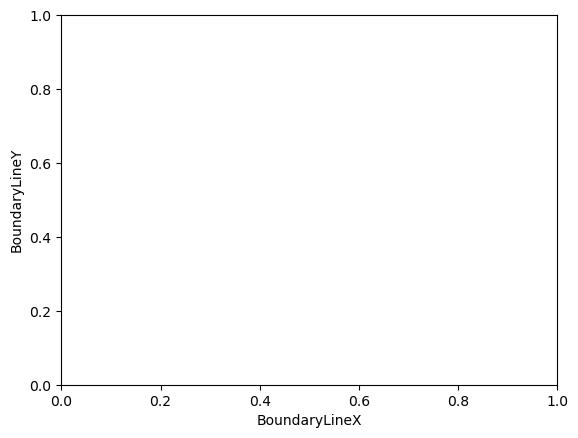

In [22]:
import matplotlib.pyplot as plt
ptp_time = 1647960933.91
filtered_df = line_sample[line_sample['ptp_time'] == ptp_time]

merged_lines = []

for index, row in filtered_df.iterrows():
    if not merged_lines or row['TrackingID'] != merged_lines[-1]['TrackingID']:
        merged_lines.append(row)
    else:
        merged_lines[-1]['BoundaryLineX'].extend(row['BoundaryLineX'])
        merged_lines[-1]['BoundaryLineY'].extend(row['BoundaryLineY'])


for merged_line in merged_lines:
    plt.plot(merged_line['BoundaryLineX'], merged_line['BoundaryLineY'], label=f'Tracking ID {merged_line["TrackingID"]}')

plt.xlabel('BoundaryLineX')
plt.ylabel('BoundaryLineY')

plt.show()

In [23]:
# def merge_interval(time_stamps:list):
#     time_intervals = []
#     for i in range(1,len(time_stamps)):
#         if time_stamps[i] - time_stamps[i-1] == 0.1 

Problem of approach 1: 
Hard to define "straight road section" because one scenario may contain different types of road
Unsatisfied quality of lane mark data

### LC Solution 2: the yaw of ego remains after lane changing, so detect those yaw rate changing with remaining yaw

In [24]:
ego = session.loadParquet('avl_reference','ego',record_id=recording_id[2])

In [25]:
ego.show(5)

+---------------+-------------+-------------+--------------------+------------------+--------------------+--------------------+-------------------+------------------+-------------------+------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------+----------+-----------------+
|       ptp_time|MessageNumber|ReferenceType|           PositionX|         PositionY|           PositionZ|                Roll|              Pitch|               Yaw|          VelocityX|         VelocityY|          VelocityZ|       AccelerationX|       AccelerationY|      AccelerationZ|            RollRate|           PitchRate|             YawRate|        recording_id|vehicle|sw_version|__index_level_0__|
+---------------+-------------+-------------+--------------------+------------------+--------------------+--------------------+-------------------+------------------+----------------

In [26]:
ego.select('Yaw').distinct().count()

17910

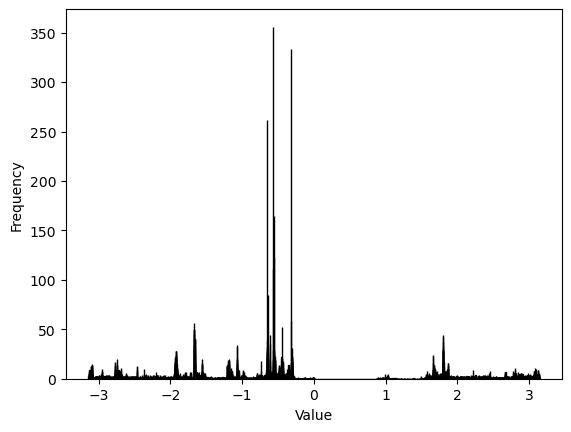

In [27]:
pandas_df = ego.select('Yaw').toPandas()
plt.hist(pandas_df['Yaw'], bins=10000, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [28]:
ego.select('YawRate').distinct().count()

17910

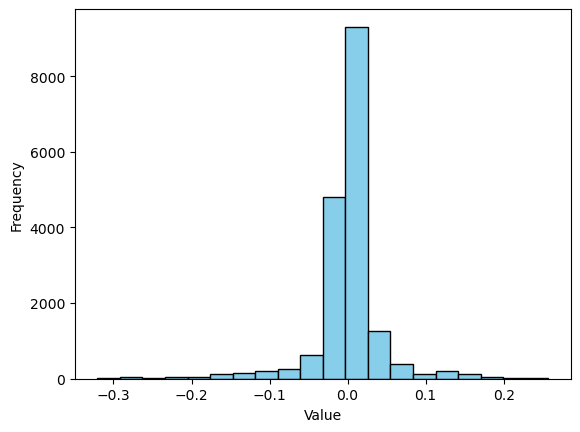

In [29]:
yawrate_df = ego.select('YawRate').toPandas()
plt.hist(yawrate_df['YawRate'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [30]:
quantiles = ego.approxQuantile('YawRate', [0.25, 0.75], 0.01)

lower_quartile = quantiles[0]
upper_quartile = quantiles[1]

print("Upper quantile", lower_quartile)
print("Lower quantile", upper_quartile)

Upper quantile -0.008685382759747137
Lower quantile 0.011338608660189129


In [31]:
max_value = ego.agg({'YawRate': 'max'}).collect()[0][0]
min_value = ego.agg({'YawRate': 'min'}).collect()[0][0]

print("Max:", max_value)
print("Min:", min_value)

Max: 0.25701257576240827
Min: -0.3206583148905613


In [32]:
max_value = ego.agg({'RollRate': 'max'}).collect()[0][0]
min_value = ego.agg({'RollRate': 'min'}).collect()[0][0]

print("Max:", max_value)
print("Min:", min_value)

Max: 0.08106649353704193
Min: -0.08754445052417256


In [33]:
max_value = ego.agg({'PitchRate': 'max'}).collect()[0][0]
min_value = ego.agg({'PitchRate': 'min'}).collect()[0][0]

print("Max:", max_value)
print("Min:", min_value)

Max: 0.12106371247883627
Min: -0.09318306603648764


In [34]:
#12:17:04 - 12:17:14 is a lane changing
time_interval = ['2022-04-08 12:17:03.000', '2022-04-08 12:17:50.000']
lc_sample_time_range = [int(pd.to_datetime(time_interval[0],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp()),
                  int(pd.to_datetime(time_interval[1],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp())]

In [35]:
lc_line_sample = line_sample[(line_sample['ptp_time'] >= lc_sample_time_range[0]) & (line_sample['ptp_time'] <= lc_sample_time_range[1])]

In [36]:
pd.options.display.max_rows = 5
lc_line_sample

,ptp_time,MessageNumber,ReferenceType,TrackingID,SensorIDList,Type,Color,BoundaryLineX,BoundaryLineY,BoundaryLineZ,recording_id,vehicle,sw_version,__index_level_0__
8623,1649420223,600,Line,28,100,3,3,"[-221.61351013183594, -219.6034698486328, -218...","[14.869032859802246, 14.21998405456543, 13.907...","[-31.814735412597656, -31.52734375, -31.393033...",FH2467_20220408_120102,FH2467,1.1.11,8703
8624,1649420223,600,Line,14,100,4,3,"[-222.7630157470703, -221.8513946533203, -219....","[18.929983139038086, 18.623891830444336, 17.94...","[-32.09831619262695, -31.969491958618164, -31....",FH2467_20220408_120102,FH2467,1.1.11,8704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359,1649420270,1069,Line,51,100,0,0,"[-0.39614784717559814, -1.3697094917297363, -2...","[10.238548278808594, 10.175481796264648, 10.17...","[-3.6530158519744873, -3.762957811355591, -3.8...",FH2467_20220408_120102,FH2467,1.1.11,13439
13360,1649420270,1069,Line,48,100,0,0,"[-53.96757507324219, -52.93647003173828, -52.0...","[-9.014376640319824, -9.128028869628906, -9.19...","[-10.119203567504883, -10.002697944641113, -9....",FH2467_20220408_120102,FH2467,1.1.11,13440


In [37]:
lc_sample = ego.filter(ego.ptp_time.between(lc_sample_time_range[0],lc_sample_time_range[1])).toPandas()

In [38]:
pd.options.display.float_format = None
pd.options.display.max_rows = 5
lc_sample

,ptp_time,MessageNumber,ReferenceType,PositionX,PositionY,PositionZ,Roll,Pitch,Yaw,VelocityX,...,AccelerationX,AccelerationY,AccelerationZ,RollRate,PitchRate,YawRate,recording_id,vehicle,sw_version,__index_level_0__
0,1.649420e+09,600,Ego,-0.711239,-1.961750,0.018259,0.000670,0.110783,-1.908257,-6.876412,...,0.079541,-0.142631,-1.264068,0.012451,-0.015062,0.020061,FH2467_20220408_120102,FH2467,1.1.11,59453
1,1.649420e+09,601,Ego,-1.424045,-3.925291,0.031119,0.001445,0.113223,-1.908508,-6.877051,...,0.287941,0.628934,-0.360189,0.020970,-0.012069,-0.002940,FH2467_20220408_120102,FH2467,1.1.11,59454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,1.649420e+09,1068,Ego,-351.246705,-933.971774,-1.057275,0.003843,0.137136,-1.933823,-7.355409,...,0.036677,-0.185158,-0.140932,0.005203,-0.014705,0.002586,FH2467_20220408_120102,FH2467,1.1.11,59921
469,1.649420e+09,1069,Ego,-352.009045,-935.944794,-1.101119,0.004530,0.137822,-1.933997,-7.357619,...,-0.484459,-0.271725,-0.001141,0.007810,-0.006660,-0.013473,FH2467_20220408_120102,FH2467,1.1.11,59922


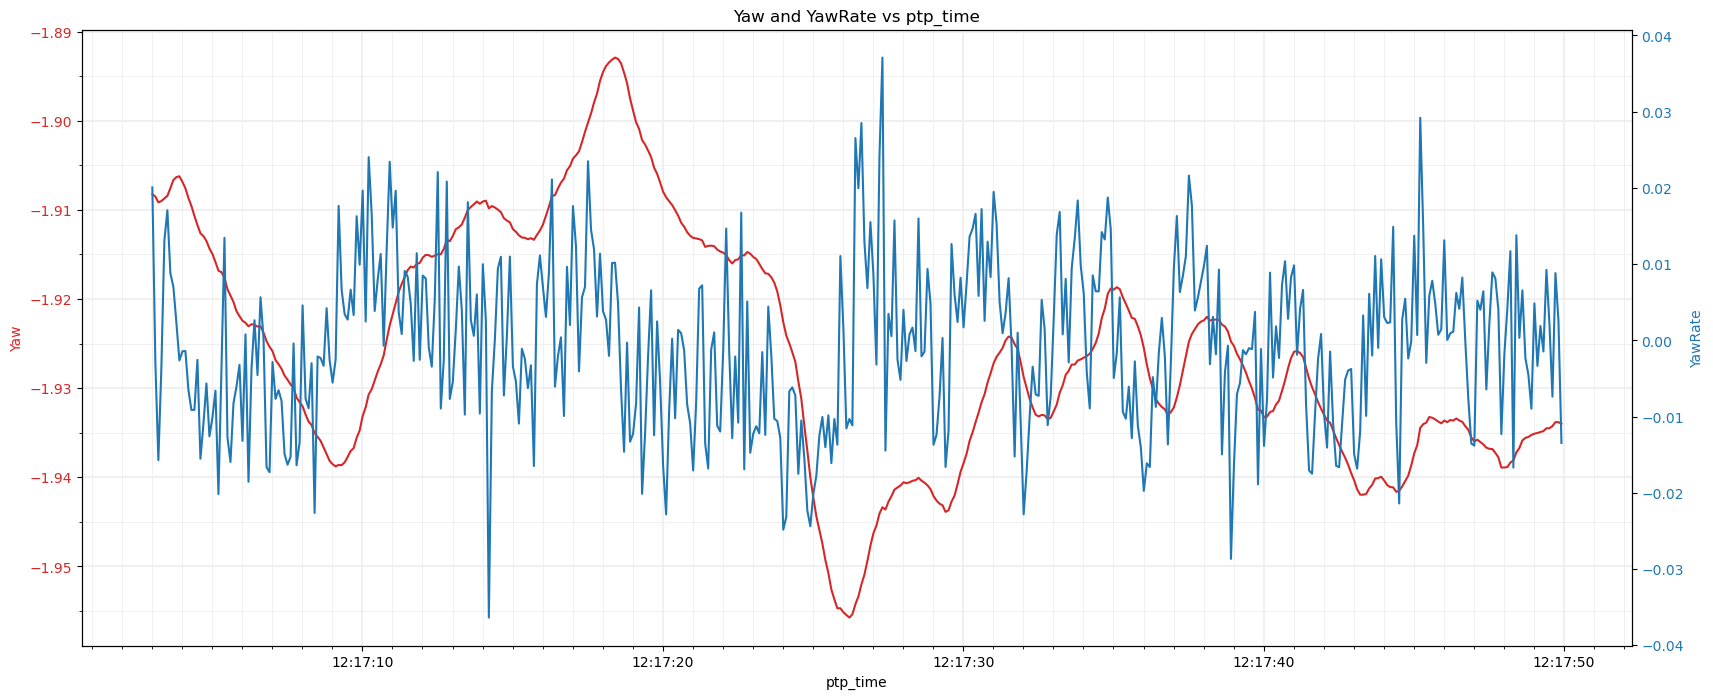

In [39]:
from matplotlib.ticker import AutoMinorLocator

fig, ax1 = plt.subplots(figsize=(20,8))

lc_sample['ptp_time'] = pd.to_datetime(lc_sample['ptp_time'], unit='s')

color = 'tab:red'
ax1.set_xlabel('ptp_time')
ax1.set_ylabel('Yaw', color=color)
ax1.plot(lc_sample['ptp_time'], lc_sample['Yaw'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('YawRate', color=color)
ax2.plot(lc_sample['ptp_time'], lc_sample['YawRate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# ax2.axhline(y=0.01, color='gray', linestyle='--')
# ax2.axhline(y=-0.01, color='gray', linestyle='--')
# ax2.axhline(y=0.015, color='gray', linestyle='--')
# ax2.axhline(y=-0.015, color='gray', linestyle='--')
# ax2.axhline(y=0.02, color='gray', linestyle='--')
# ax2.axhline(y=-0.02, color='gray', linestyle='--')

ax1.grid(which='major', color='#EEEEEE', linewidth=1.2)
ax1.grid(which='minor', color='#EEEEEE', linewidth=0.6)
ax1.minorticks_on()

ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.title('Yaw and YawRate vs ptp_time')
plt.show()


In [40]:
# plt.plot(lc_sample['PositionX'], lc_sample['PositionY'], linestyle='-')

# plt.xlabel('PositionX')
# plt.ylabel('PositionY')
# plt.title('Trajectory')
# plt.grid(True)
# plt.axis('equal')
# plt.show()

In [41]:
time_interval = ['2022-04-08 12:17:03.000', '2022-04-08 12:21:00.000']
whole_sample_time_range = [int(pd.to_datetime(time_interval[0],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp()),
                  int(pd.to_datetime(time_interval[1],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp())]
whole_sample = ego.filter(ego.ptp_time.between(whole_sample_time_range[0],whole_sample_time_range[1])).toPandas()

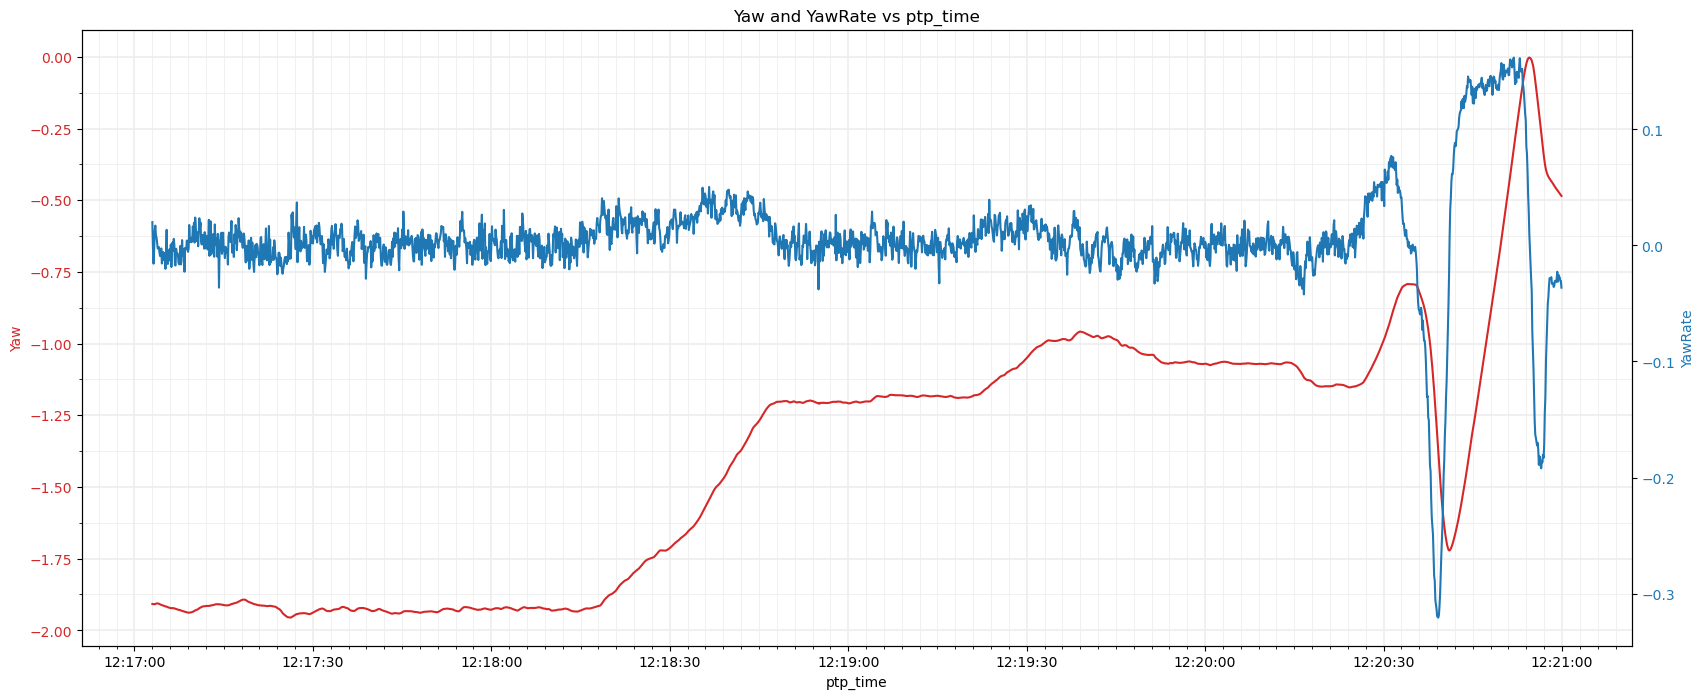

In [42]:
from matplotlib.ticker import AutoMinorLocator

fig, ax1 = plt.subplots(figsize=(20,8))

whole_sample['ptp_time'] = pd.to_datetime(whole_sample['ptp_time'], unit='s')

color = 'tab:red'
ax1.set_xlabel('ptp_time')
ax1.set_ylabel('Yaw', color=color)
ax1.plot(whole_sample['ptp_time'], whole_sample['Yaw'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('YawRate', color=color)
ax2.plot(whole_sample['ptp_time'], whole_sample['YawRate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# ax2.axhline(y=0.01, color='gray', linestyle='--')
# ax2.axhline(y=-0.01, color='gray', linestyle='--')
# ax2.axhline(y=0.015, color='gray', linestyle='--')
# ax2.axhline(y=-0.015, color='gray', linestyle='--')
# ax2.axhline(y=0.02, color='gray', linestyle='--')
# ax2.axhline(y=-0.02, color='gray', linestyle='--')

ax1.grid(which='major', color='#EEEEEE', linewidth=1.2)
ax1.grid(which='minor', color='#EEEEEE', linewidth=0.6)
ax1.minorticks_on()

ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.title('Yaw and YawRate vs ptp_time')
plt.show()

In [43]:
def find_matching_ptp_times(df, minimum=40, maximum=70):
    matching_ptp_times = []

    i = 0
    while i < len(df):
        current_yaw = df.loc[i, 'Yaw']
        current_ptp_time = df.loc[i, 'ptp_time']
        found_matching_pair = False

        # Check the next 'maximum' rows
        for j in range(i + 1, min(i + maximum + 1, len(df))):
            if (abs(df.loc[j, 'Yaw'] - current_yaw) <= 0.001) and (abs(df.loc[round((i+j)/2), 'Yaw'] - current_yaw)>0.015) and (abs(df.loc[round((i+j)/2), 'Yaw'] - current_yaw)<0.1):
                # Check if the matching row is within the specified range
                if j >= i + minimum:
                    matching_pair = (current_ptp_time, df.loc[j, 'ptp_time'])
                    matching_ptp_times.append(matching_pair)
                    i = i + 41 
                    found_matching_pair = True
                    break  # If a match is found, exit the inner loop
                else:
                    i += 1
                    break

        if not found_matching_pair:
            i += 1

    return matching_ptp_times

In [44]:

matching_times = find_matching_ptp_times(whole_sample)


In [45]:
matching_times

[(Timestamp('2022-04-08 12:17:05.009999872'),
  Timestamp('2022-04-08 12:17:11.910000128')),
 (Timestamp('2022-04-08 12:17:15.009999872'),
  Timestamp('2022-04-08 12:17:20.609999872')),
 (Timestamp('2022-04-08 12:17:24.309999872'),
  Timestamp('2022-04-08 12:17:31.109999872')),
 (Timestamp('2022-04-08 12:20:31.809999872'),
  Timestamp('2022-04-08 12:20:36.809999872'))]

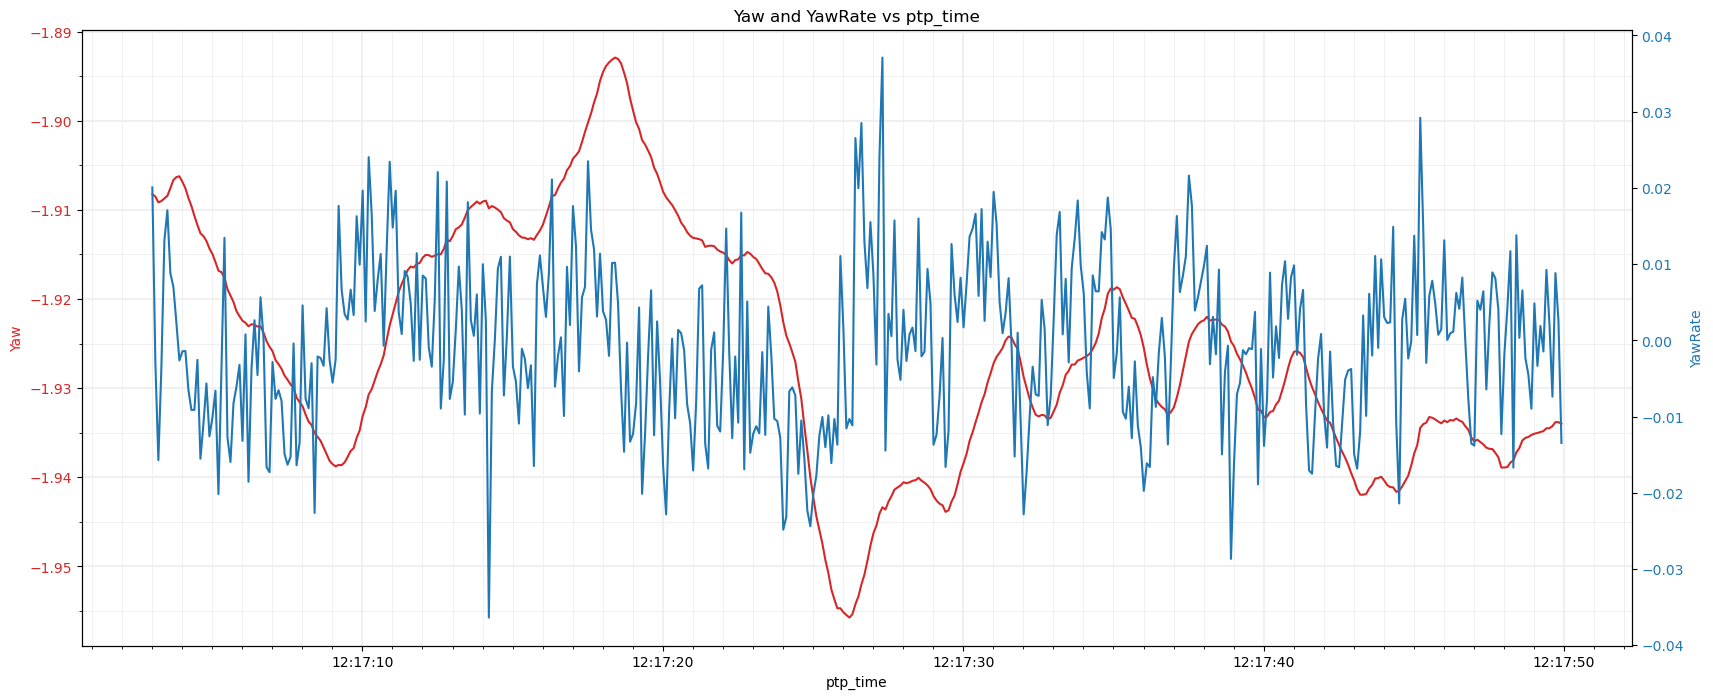

In [46]:
from matplotlib.ticker import AutoMinorLocator

fig, ax1 = plt.subplots(figsize=(20,8))

lc_sample['ptp_time'] = pd.to_datetime(lc_sample['ptp_time'], unit='s')

color = 'tab:red'
ax1.set_xlabel('ptp_time')
ax1.set_ylabel('Yaw', color=color)
ax1.plot(lc_sample['ptp_time'], lc_sample['Yaw'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('YawRate', color=color)
ax2.plot(lc_sample['ptp_time'], lc_sample['YawRate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# ax2.axhline(y=0.01, color='gray', linestyle='--')
# ax2.axhline(y=-0.01, color='gray', linestyle='--')
# ax2.axhline(y=0.015, color='gray', linestyle='--')
# ax2.axhline(y=-0.015, color='gray', linestyle='--')
# ax2.axhline(y=0.02, color='gray', linestyle='--')
# ax2.axhline(y=-0.02, color='gray', linestyle='--')

ax1.grid(which='major', color='#EEEEEE', linewidth=1.2)
ax1.grid(which='minor', color='#EEEEEE', linewidth=0.6)
ax1.minorticks_on()

ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.title('Yaw and YawRate vs ptp_time')
plt.show()

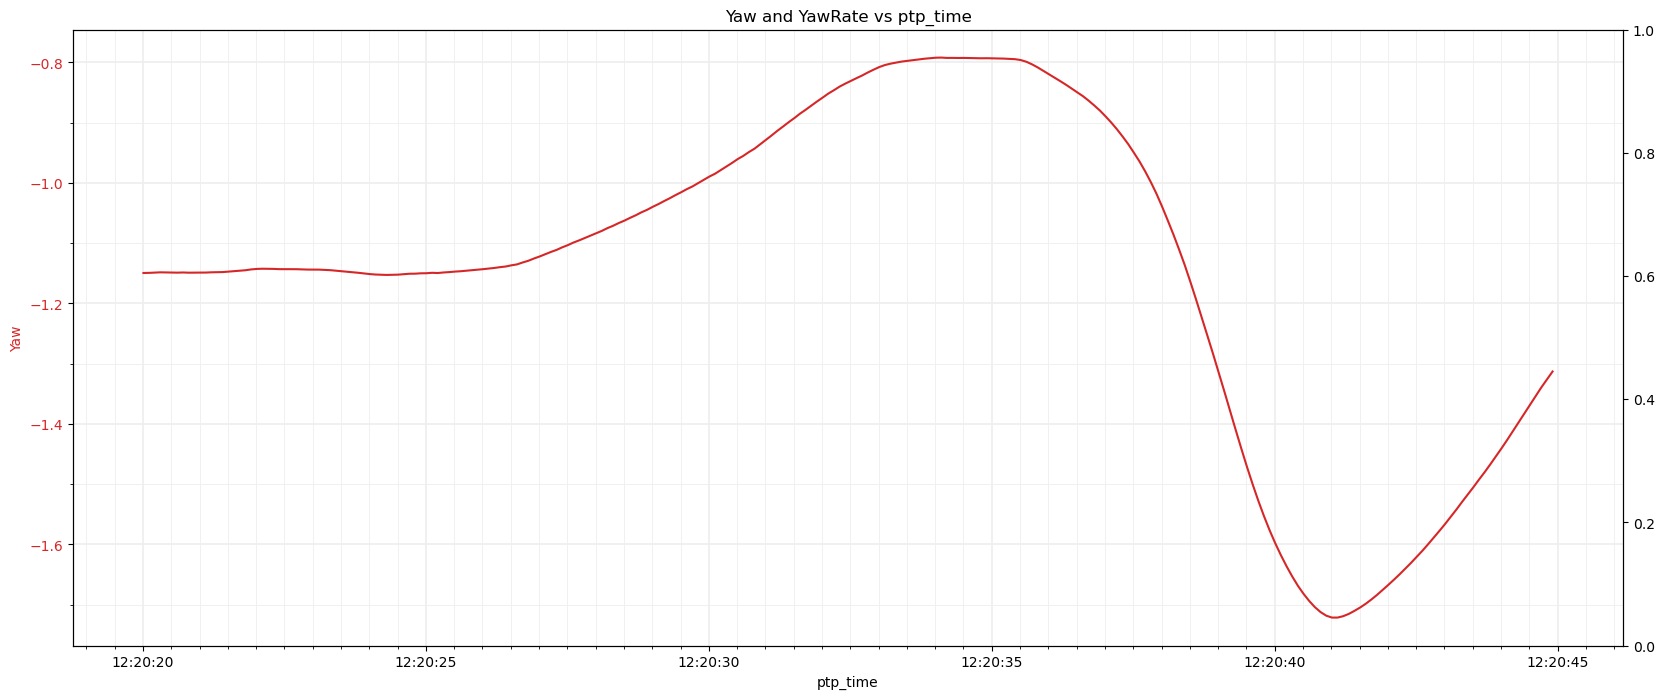

In [47]:
time_interval = ['2022-04-08 12:20:20.000', '2022-04-08 12:20:45.000']
sample_time_range = [int(pd.to_datetime(time_interval[0],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp()),
                  int(pd.to_datetime(time_interval[1],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp())]
sample = ego.filter(ego.ptp_time.between(sample_time_range[0],sample_time_range[1])).toPandas()

from matplotlib.ticker import AutoMinorLocator

fig, ax1 = plt.subplots(figsize=(20,8))

sample['ptp_time'] = pd.to_datetime(sample['ptp_time'], unit='s')

color = 'tab:red'
ax1.set_xlabel('ptp_time')
ax1.set_ylabel('Yaw', color=color)
ax1.plot(sample['ptp_time'], sample['Yaw'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

# color = 'tab:blue'
# ax2.set_ylabel('YawRate', color=color)
# ax2.plot(whole_sample['ptp_time'], whole_sample['YawRate'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# ax2.axhline(y=0.01, color='gray', linestyle='--')
# ax2.axhline(y=-0.01, color='gray', linestyle='--')
# ax2.axhline(y=0.015, color='gray', linestyle='--')
# ax2.axhline(y=-0.015, color='gray', linestyle='--')
# ax2.axhline(y=0.02, color='gray', linestyle='--')
# ax2.axhline(y=-0.02, color='gray', linestyle='--')

ax1.grid(which='major', color='#EEEEEE', linewidth=1.2)
ax1.grid(which='minor', color='#EEEEEE', linewidth=0.6)
ax1.minorticks_on()

ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.title('Yaw and YawRate vs ptp_time')
plt.show()


In [48]:
time_interval = ['2022-04-08 12:21:03.000', '2022-04-08 12:26:00.000']
test_sample_time_range = [int(pd.to_datetime(time_interval[0],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp()),
                  int(pd.to_datetime(time_interval[1],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp())]
test_sample = ego.filter(ego.ptp_time.between(test_sample_time_range[0],test_sample_time_range[1])).toPandas()

In [49]:
test_sample['ptp_time'] = pd.to_datetime(test_sample['ptp_time'], unit='s')
test_times = find_matching_ptp_times(test_sample)

In [50]:
test_times

[(Timestamp('2022-04-08 12:21:14.109999872'),
  Timestamp('2022-04-08 12:21:21.109999872')),
 (Timestamp('2022-04-08 12:21:49.410000128'),
  Timestamp('2022-04-08 12:21:55.809999872')),
 (Timestamp('2022-04-08 12:21:59.910000128'),
  Timestamp('2022-04-08 12:22:06.910000128')),
 (Timestamp('2022-04-08 12:22:06.009999872'),
  Timestamp('2022-04-08 12:22:11.509999872')),
 (Timestamp('2022-04-08 12:22:15.210000128'),
  Timestamp('2022-04-08 12:22:22.009999872')),
 (Timestamp('2022-04-08 12:22:31.509999872'),
  Timestamp('2022-04-08 12:22:38.009999872')),
 (Timestamp('2022-04-08 12:22:40.109999872'),
  Timestamp('2022-04-08 12:22:46.410000128')),
 (Timestamp('2022-04-08 12:22:55.710000128'),
  Timestamp('2022-04-08 12:23:00.210000128')),
 (Timestamp('2022-04-08 12:24:38.309999872'),
  Timestamp('2022-04-08 12:24:44.009999872')),
 (Timestamp('2022-04-08 12:24:56.109999872'),
  Timestamp('2022-04-08 12:25:03.109999872'))]

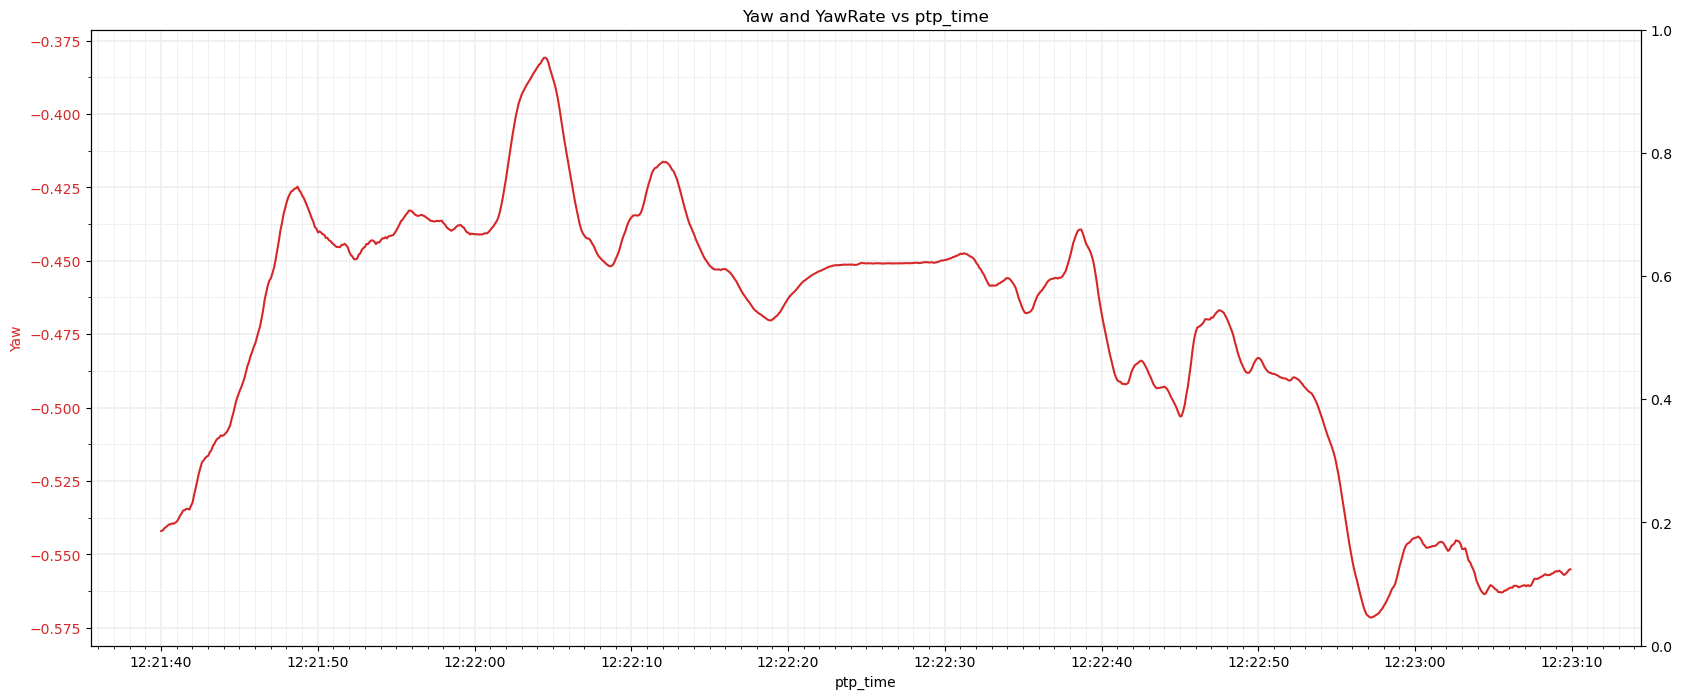

In [51]:
time_interval = ['2022-04-08 12:21:40.000', '2022-04-08 12:23:10.000']
sample_time_range = [int(pd.to_datetime(time_interval[0],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp()),
                  int(pd.to_datetime(time_interval[1],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp())]
sample = ego.filter(ego.ptp_time.between(sample_time_range[0],sample_time_range[1])).toPandas()

from matplotlib.ticker import AutoMinorLocator

fig, ax1 = plt.subplots(figsize=(20,8))

sample['ptp_time'] = pd.to_datetime(sample['ptp_time'], unit='s')

color = 'tab:red'
ax1.set_xlabel('ptp_time')
ax1.set_ylabel('Yaw', color=color)
ax1.plot(sample['ptp_time'], sample['Yaw'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

# color = 'tab:blue'
# ax2.set_ylabel('YawRate', color=color)
# ax2.plot(whole_sample['ptp_time'], whole_sample['YawRate'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# ax2.axhline(y=0.01, color='gray', linestyle='--')
# ax2.axhline(y=-0.01, color='gray', linestyle='--')
# ax2.axhline(y=0.015, color='gray', linestyle='--')
# ax2.axhline(y=-0.015, color='gray', linestyle='--')
# ax2.axhline(y=0.02, color='gray', linestyle='--')
# ax2.axhline(y=-0.02, color='gray', linestyle='--')

ax1.grid(which='major', color='#EEEEEE', linewidth=1.2)
ax1.grid(which='minor', color='#EEEEEE', linewidth=0.6)
ax1.minorticks_on()

ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.title('Yaw and YawRate vs ptp_time')
plt.show()


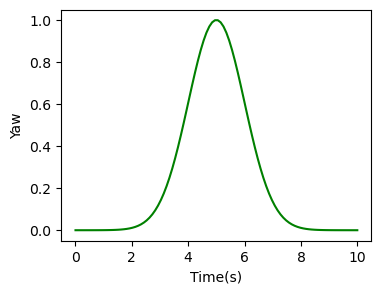

In [52]:

x = np.linspace(0, 10, 100)
mu = 5
sigma = 1 
y_hill = np.exp(-(x - mu)**2 / (2 * sigma**2))

plt.figure(figsize=(4,3))
plt.ylabel('Yaw')
plt.xlabel('Time(s)')
plt.plot(x, y_hill, color='green')
# plt.legend()
plt.show()

In [53]:
ego.show(5)

+---------------+-------------+-------------+--------------------+------------------+--------------------+--------------------+-------------------+------------------+-------------------+------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------+----------+-----------------+
|       ptp_time|MessageNumber|ReferenceType|           PositionX|         PositionY|           PositionZ|                Roll|              Pitch|               Yaw|          VelocityX|         VelocityY|          VelocityZ|       AccelerationX|       AccelerationY|      AccelerationZ|            RollRate|           PitchRate|             YawRate|        recording_id|vehicle|sw_version|__index_level_0__|
+---------------+-------------+-------------+--------------------+------------------+--------------------+--------------------+-------------------+------------------+----------------

In [69]:
# FH2467_20220328_170218,"[[1648487629.864, 1648487698.864], [1648488269.864, 1648488419.864], [1648488631.8630002, 1648488688.8630002], [1648488824.865, 1648488908.865], [1648488933.865, 1648489076.864], [1648489411.864, 1648489492.864], [1648489636.864, 1648489712.864]]
test1 = []
for item in [[1648487629.864, 1648487698.864], [1648488269.864, 1648488419.864], [1648488631.8630002, 1648488688.8630002], [1648488824.865, 1648488908.865], [1648488933.865, 1648489076.864], [1648489411.864, 1648489492.864], [1648489636.864, 1648489712.864]]:
    test1.append(pd.to_datetime(item, unit='s'))
test1

[DatetimeIndex(['2022-03-28 17:13:49.864000082', '2022-03-28 17:14:58.864000082'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2022-03-28 17:24:29.864000082', '2022-03-28 17:26:59.864000082'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2022-03-28 17:30:31.863000154', '2022-03-28 17:31:28.863000154'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2022-03-28 17:33:44.865000010', '2022-03-28 17:35:08.865000010'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2022-03-28 17:35:33.865000010', '2022-03-28 17:37:56.864000082'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2022-03-28 17:43:31.864000082', '2022-03-28 17:44:52.864000082'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2022-03-28 17:47:16.864000082', '2022-03-28 17:48:32.864000082'], dtype='datetime64[ns]', freq=None)]

In [84]:
def load_sample(recording_id: str, time_interval: list=None) -> pd.DataFrame :
    ego = session.loadParquet('avl_reference','ego',record_id=recording_id)
    if time_interval is not None:
        lc_sample_time_range = [pd.to_datetime(time_interval[0],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp(),
                    pd.to_datetime(time_interval[1],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp()]
        print(lc_sample_time_range)
        lc_sample = ego.filter(ego.ptp_time.between(lc_sample_time_range[0],lc_sample_time_range[1])).toPandas()
    else:        
        lc_sample = ego.toPandas()
    lc_sample['ptp_time'] = pd.to_datetime(lc_sample['ptp_time'], unit='s')
    return lc_sample

In [85]:
test_sample = load_sample("FH2467_20220328_170218", [1648488269.864, 1648488419.864])


[1.648488, 1.648488]


In [86]:
test_sample

,ptp_time,MessageNumber,ReferenceType,PositionX,PositionY,PositionZ,Roll,Pitch,Yaw,VelocityX,...,AccelerationX,AccelerationY,AccelerationZ,RollRate,PitchRate,YawRate,recording_id,vehicle,sw_version,__index_level_0__
